In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import argparse
import os
import tensorflow as tf
sns.set_style('whitegrid')
from glob import glob


Using TensorFlow backend.


In [2]:
# read NIH data, the csv

df_NIH = pd.read_csv(r'C:\Users\Zijian\OneDrive - Cranfield University\Group project\NIH\Data_Entry_2017.csv')
# only keep the illnesss label and image names

df_NIH = df_NIH[['Image Index', 'Finding Labels']]
# create a column to store the full path of images for later reading
# You should change the below path when running at your computer

my_glob = glob('C:/Users/Zijian/OneDrive - Cranfield University/Group project/NIH/images/images/*.png')
print('Number of Observations: ', len(my_glob))
full_img_paths = {os.path.basename(x): x for x in my_glob}

df_NIH['path'] = df_NIH['Image Index'].map(full_img_paths.get)
# extract four common illness from NIH datasets

df_NIH_effusion = df_NIH[df_NIH['Finding Labels'].isin(['Effusion'])]
df_NIH_atelectasis = df_NIH[df_NIH['Finding Labels'].isin(['Atelectasis'])]
df_NIH_infiltration = df_NIH[df_NIH['Finding Labels'].isin(['Infiltration'])]
df_NIH_pneumonia = df_NIH[df_NIH['Finding Labels'].isin(['Pneumonia'])]
df_NIH_none = df_NIH[df_NIH['Finding Labels'].isin(['No Finding'])]


Number of Observations:  112120


In [3]:
len(df_NIH_none)

60361

In [4]:
glob2 = glob('C:/Users/Zijian/Cranfield University/Muhammad Hasan Ali, Hasan - GroupProject/Research/PNEUMONIA/*.jpeg')
df_Phe = pd.DataFrame(glob2, columns=['path'])
df_Phe['Finding Labels'] = 'Pneumonia'


In [5]:
df_NIH[df_NIH['Finding Labels'].isin(['Effusion', 'Atelectasis', 'Infiltration', 'Pneumonia', 'Nodule', 'No Finding'])]


,Image Index,Finding Labels,path
3,00000002_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
13,00000005_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
14,00000005_001.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
15,00000005_002.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
16,00000005_003.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
...,...,...,...
112114,00030801_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
112116,00030802_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
112117,00030803_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
112118,00030804_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...


In [6]:
df_NIH['Finding Labels'] = df_NIH[df_NIH['Finding Labels'].isin(['Effusion', 'Atelectasis', 'Infiltration', 'Pneumonia', 'Nodule', 'No Finding'])]


In [7]:
df_NIH

,Image Index,Finding Labels,path
0,00000001_000.png,NaN,C:/Users/Zijian/OneDrive - Cranfield Universit...
1,00000001_001.png,NaN,C:/Users/Zijian/OneDrive - Cranfield Universit...
2,00000001_002.png,NaN,C:/Users/Zijian/OneDrive - Cranfield Universit...
3,00000002_000.png,00000002_000.png,C:/Users/Zijian/OneDrive - Cranfield Universit...
4,00000003_000.png,NaN,C:/Users/Zijian/OneDrive - Cranfield Universit...
...,...,...,...
112115,00030801_001.png,NaN,C:/Users/Zijian/OneDrive - Cranfield Universit...
112116,00030802_000.png,00030802_000.png,C:/Users/Zijian/OneDrive - Cranfield Universit...
112117,00030803_000.png,00030803_000.png,C:/Users/Zijian/OneDrive - Cranfield Universit...
112118,00030804_000.png,00030804_000.png,C:/Users/Zijian/OneDrive - Cranfield Universit...


In [8]:
df_NIH = pd.read_csv(r'C:\Users\Zijian\OneDrive - Cranfield University\Group project\NIH\Data_Entry_2017.csv')
# only keep the illnesss label and image names

df_NIH = df_NIH[['Image Index', 'Finding Labels']]


In [9]:
# extract four common illness from NIH datasets

df_NIH_effusion = df_NIH[df_NIH['Finding Labels'].isin(['Effusion'])]
df_NIH_atelectasis = df_NIH[df_NIH['Finding Labels'].isin(['Atelectasis'])]
df_NIH_infiltration = df_NIH[df_NIH['Finding Labels'].isin(['Infiltration'])]
df_NIH_pneumonia = df_NIH[df_NIH['Finding Labels'].isin(['Pneumonia'])]
df_NIH_none = df_NIH[df_NIH['Finding Labels'].isin(['No Finding'])]



In [10]:
df_NIH_new = df_NIH[df_NIH['Finding Labels'].isin(['Effusion', 'Atelectasis', 'Infiltration', 'Pneumonia', 'Nodule', 'No Finding'])]


In [11]:
df_NIH_new

,Image Index,Finding Labels
3,00000002_000.png,No Finding
13,00000005_000.png,No Finding
14,00000005_001.png,No Finding
15,00000005_002.png,No Finding
16,00000005_003.png,No Finding
...,...,...
112114,00030801_000.png,No Finding
112116,00030802_000.png,No Finding
112117,00030803_000.png,No Finding
112118,00030804_000.png,No Finding


In [12]:
df_NIH.sample(20)

,Image Index,Finding Labels
49325,00012509_000.png,Cardiomegaly
76349,00018735_008.png,No Finding
32196,00008426_002.png,No Finding
47558,00012079_002.png,No Finding
111814,00030636_011.png,Atelectasis|Effusion
85737,00021154_004.png,Infiltration
107196,00028923_000.png,Nodule
82049,00020191_003.png,Effusion
110211,00029998_009.png,Pleural_Thickening|Pneumothorax
43210,00011144_023.png,Mass


In [13]:
df_NIH_new.sample(50)

,Image Index,Finding Labels
8368,00002219_001.png,No Finding
111118,00030323_045.png,Infiltration
92492,00023089_005.png,No Finding
68367,00016881_000.png,No Finding
32963,00008626_031.png,No Finding
44816,00011522_003.png,Atelectasis
40231,00010481_034.png,No Finding
55651,00013922_020.png,No Finding
38555,00010069_011.png,No Finding
96979,00025569_000.png,No Finding


In [14]:
len(df_NIH_new)

81105

In [15]:
df_NIH

,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema
2,00000001_002.png,Cardiomegaly|Effusion
3,00000002_000.png,No Finding
4,00000003_000.png,Hernia
...,...,...
112115,00030801_001.png,Mass|Pneumonia
112116,00030802_000.png,No Finding
112117,00030803_000.png,No Finding
112118,00030804_000.png,No Finding


In [16]:
df_NIH = df_NIH[df_NIH['Finding Labels'].isin(['Effusion', 'Atelectasis', 'Infiltration', 'Pneumonia', 'Nodule', 'No Finding'])]


In [17]:
df_NIH

,Image Index,Finding Labels
3,00000002_000.png,No Finding
13,00000005_000.png,No Finding
14,00000005_001.png,No Finding
15,00000005_002.png,No Finding
16,00000005_003.png,No Finding
...,...,...
112114,00030801_000.png,No Finding
112116,00030802_000.png,No Finding
112117,00030803_000.png,No Finding
112118,00030804_000.png,No Finding


In [18]:
df_NIH[df_NIH['Finding Labels'].isin(['Nodule']]

SyntaxError: invalid syntax (<ipython-input-18-4c40aa898dd8>, line 1)

In [19]:
df_NIH[df_NIH['Finding Labels'].isin(['Nodule'])]

,Image Index,Finding Labels
25,00000008_002.png,Nodule
96,00000021_000.png,Nodule
230,00000049_000.png,Nodule
301,00000071_000.png,Nodule
305,00000071_004.png,Nodule
...,...,...
111967,00030697_000.png,Nodule
111975,00030703_000.png,Nodule
111976,00030703_001.png,Nodule
112001,00030722_000.png,Nodule


In [20]:
my_glob = glob('C:/Users/Zijian/OneDrive - Cranfield University/Group project/NIH/images/images/*.png')
print('Number of Observations: ', len(my_glob))
full_img_paths = {os.path.basename(x): x for x in my_glob}
df_NIH['path'] = df_NIH['Image Index'].map(full_img_paths.get)


Number of Observations:  112120


In [21]:
df_NIH = df_NIH[df_NIH['Finding Labels'].isin(['Effusion', 'Atelectasis', 'Infiltration', 'Pneumonia', 'Nodule', 'No Finding'])]


In [22]:
df_NIH

,Image Index,Finding Labels,path
3,00000002_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
13,00000005_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
14,00000005_001.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
15,00000005_002.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
16,00000005_003.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
...,...,...,...
112114,00030801_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
112116,00030802_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
112117,00030803_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
112118,00030804_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...


In [23]:
labels = ['Effusion', 'Atelectasis', 'Infiltration', 'Pneumonia', 'Nodule', 'No Finding']
df_NIH = df_NIH[df_NIH['Finding Labels'].isin(labels)]


In [24]:
# add 3800 pneumonia images from other datasets

glob2 = glob('C:/Users/Zijian/Cranfield University/Muhammad Hasan Ali, Hasan - GroupProject/Research/PNEUMONIA/*.jpeg')
df_extraPhe = pd.DataFrame(glob2, columns=['path'])
df_extraPhe['Finding Labels'] = 'Pneumonia'


In [25]:
df_NIH = pd.concat([df_NIH, df_extraPhe])


In [26]:
df_NIH

,Image Index,Finding Labels,path
3,00000002_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
13,00000005_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
14,00000005_001.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
15,00000005_002.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
16,00000005_003.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
...,...,...,...
3870,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3871,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3872,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3873,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...


In [27]:
len(df_NIH['Finding Labels'].isin('Effusion'))

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [28]:
len(df_NIH[df_NIH['Finding Labels'].isin('Effusion')])

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [29]:
df_NIH[df_NIH['Finding Labels'].isin('Effusion')]

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [30]:
df_NIH

,Image Index,Finding Labels,path
3,00000002_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
13,00000005_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
14,00000005_001.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
15,00000005_002.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
16,00000005_003.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
...,...,...,...
3870,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3871,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3872,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3873,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...


In [31]:
df_NIH['Finding Labels']['Effusion']

KeyError: 'Effusion'

In [32]:
labels = ['Effusion', 'Atelectasis', 'Infiltration', 'Pneumonia', 'Nodule', 'No Finding']
df_NIH = df_NIH[df_NIH['Finding Labels'].isin(labels)]


In [33]:
df_NIH

,Image Index,Finding Labels,path
3,00000002_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
13,00000005_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
14,00000005_001.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
15,00000005_002.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
16,00000005_003.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
...,...,...,...
3870,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3871,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3872,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3873,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...


In [34]:
df_NIH['Finding Labels']['Pneumonia']

KeyError: 'Pneumonia'

In [35]:
df_NIH[:, ['Finding Labels']]

TypeError: '(slice(None, None, None), ['Finding Labels'])' is an invalid key

In [36]:
df_NIH

,Image Index,Finding Labels,path
3,00000002_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
13,00000005_000.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
14,00000005_001.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
15,00000005_002.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
16,00000005_003.png,No Finding,C:/Users/Zijian/OneDrive - Cranfield Universit...
...,...,...,...
3870,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3871,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3872,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...
3873,NaN,Pneumonia,C:/Users/Zijian/Cranfield University/Muhammad ...


In [37]:
df_NIH['Finding Labels'].isin(['No Finding'])

3        True
13       True
14       True
15       True
16       True
        ...  
3870    False
3871    False
3872    False
3873    False
3874    False
Name: Finding Labels, Length: 84980, dtype: bool

In [38]:
len(df_NIH['Finding Labels'].isin(['No Finding']))

84980

In [39]:
len(df_NIH[df_NIH['Finding Labels'].isin(['No Finding'])])

60361

In [40]:
for i in labels:
	num = len(df_NIH['Finding Labels'].isin([i]))


In [41]:
num = []

for i in labels:
	temp = len(df_NIH['Finding Labels'].isin([i]))
	num.append(temp)


In [42]:
num

[84980, 84980, 84980, 84980, 84980, 84980]

In [43]:
num = []

for i in labels:
	temp = len(df_NIH[df_NIH['Finding Labels'].isin([i])])
	num.append(temp)


In [44]:
num

[3955, 4215, 9547, 4197, 2705, 60361]

In [45]:
sns.barplot(x=labels, y=None, data=num, color="green")


AttributeError: 'list' object has no attribute 'get'

In [46]:
num

[3955, 4215, 9547, 4197, 2705, 60361]

In [47]:
sns.barplot(x=labels, y=None, data=pd.DataFrame(num), color="green")


TypeError: cannot perform reduce with flexible type

In [48]:
np.array(num)

array([ 3955,  4215,  9547,  4197,  2705, 60361])

In [49]:
sns.barplot(x=labels, y=None, data=np.array(num), color="green")


AttributeError: 'numpy.ndarray' object has no attribute 'get'

In [50]:
tips = sns.load_dataset('tips')


In [51]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [52]:
df_draw = pd.Dataframe([lables, num])


AttributeError: module 'pandas' has no attribute 'Dataframe'

In [53]:
df_draw = pd.DataFrame([lables, num])


NameError: name 'lables' is not defined

In [54]:
df_draw = pd.DataFrame([labels, num])


In [55]:
df_draw

,0,1,2,3,4,5
0,Effusion,Atelectasis,Infiltration,Pneumonia,Nodule,No Finding
1,3955,4215,9547,4197,2705,60361


In [56]:
df_draw['labels'] = labels
df_draw['num'] = num


ValueError: Length of values does not match length of index

In [57]:
df_draw['labels'] = labels


ValueError: Length of values does not match length of index

In [58]:
df_draw = pd.DataFrame()


In [59]:
df_draw['labels'] = labels
df_draw['num'] = num


In [60]:
df_draw

,labels,num
0,Effusion,3955
1,Atelectasis,4215
2,Infiltration,9547
3,Pneumonia,4197
4,Nodule,2705
5,No Finding,60361


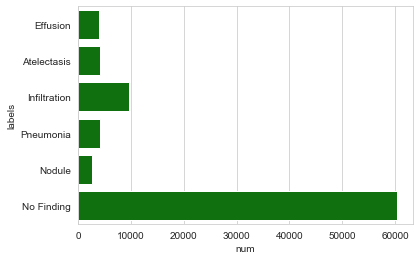

In [61]:
sns.barplot(x='num', y='labels', data=df_draw, color="green")


In [62]:
df_draw = pd.DataFrame(data={'labels':labels, 'num':num})


In [63]:
df_draw

,labels,num
0,Effusion,3955
1,Atelectasis,4215
2,Infiltration,9547
3,Pneumonia,4197
4,Nodule,2705
5,No Finding,60361


In [64]:
df_draw.sort_values(by='num')

,labels,num
4,Nodule,2705
0,Effusion,3955
3,Pneumonia,4197
1,Atelectasis,4215
2,Infiltration,9547
5,No Finding,60361


In [65]:
df_draw.sort_values(by='num', ascending=False)

,labels,num
5,No Finding,60361
2,Infiltration,9547
1,Atelectasis,4215
3,Pneumonia,4197
0,Effusion,3955
4,Nodule,2705


In [66]:
df_draw.sort_values(by='num', ascending=False)


,labels,num
5,No Finding,60361
2,Infiltration,9547
1,Atelectasis,4215
3,Pneumonia,4197
0,Effusion,3955
4,Nodule,2705


In [67]:
df_draw

,labels,num
0,Effusion,3955
1,Atelectasis,4215
2,Infiltration,9547
3,Pneumonia,4197
4,Nodule,2705
5,No Finding,60361


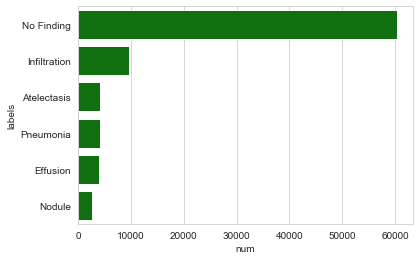

In [68]:
df_draw = pd.DataFrame(data={'labels':labels, 'num':num})
df_draw = df_draw.sort_values(by='num', ascending=False)
sns.barplot(x='num', y='labels', data=df_draw, color="green")


In [69]:
# split data into train, test, validation

train_set, valid_set = train_test_split(xray_data, test_size = 0.02, random_state = 42)
train_set, test_set = train_test_split(train_set, test_size = 0.2, random_state = 8545)


NameError: name 'xray_data' is not defined

In [70]:
xray_data = pd.concat([df_NIH, df_extraPhe])


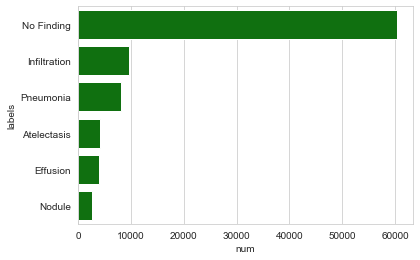

In [71]:
num = []

for i in labels:
	temp = len(xray_data[xray_data['Finding Labels'].isin([i])])
	num.append(temp)
# draw the data distribution

df_draw = pd.DataFrame(data={'labels':labels, 'num':num})
df_draw = df_draw.sort_values(by='num', ascending=False)
sns.barplot(x='num', y='labels', data=df_draw, color="green")


In [72]:
# split data into train, test, validation

train_set, valid_set = train_test_split(xray_data, test_size = 0.02, random_state = 42)
train_set, test_set = train_test_split(train_set, test_size = 0.2, random_state = 8545)


In [73]:
print("train set:" len(train_set))
print("test set:" len(test_set))
print("validation set:" len(valid_set))


SyntaxError: invalid syntax (<ipython-input-73-a1eefa8204b8>, line 1)

In [74]:
print("train set:", len(train_set))
print("test set:", len(test_set))
print("validation set:", len(valid_set))


train set: 69661
test set: 17416
validation set: 1778


In [75]:
# quick check to see that the training and test set were split properly

print("train set:", len(train_set))
print("test set:", len(test_set))
print("validation set:", len(valid_set))
print('full data set: ', len(xray_data))


train set: 69661
test set: 17416
validation set: 1778
full data set:  88855


In [76]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)


In [77]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [78]:
image_size = (128, 128) # image re-sizing target


In [79]:
train_generator = train_datagen.flow_from_dataframe(
	dataframe=train_set,
	directory=None,
	x_col='path', 
	y_col = 'Finding Labels',
	target_size=image_size,
	color_mode='rgb',
	batch_size=32,
	class_mode='categorical'
)


Found 69661 validated image filenames belonging to 6 classes.


In [80]:
train_generator

In [81]:
validation_generator = train_datagen.flow_from_dataframe(
	dataframe=test_set,
	directory=None,
	x_col='path', 
	y_col = 'Finding Labels',
	target_size=image_size,
	color_mode='rgb',
	batch_size=64,
	class_mode='categorical'	
)


Found 17416 validated image filenames belonging to 6 classes.


In [83]:
valid_X, valid_Y = next(test_datagen.flow_from_dataframe(
	dataframe=valid_set,
	directory=None,
	x_col='path', 
	y_col = 'Finding Labels',
	target_size=image_size,
	color_mode='rgb',
	batch_size= 1700,
	class_mode='categorical'
))


Found 1778 validated image filenames belonging to 6 classes.


In [84]:
# load the VGG16 network, ensuring the head FC layer sets are left off

baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(128, 128, 3)))
# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)

headModel = Dense(6, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.5e-3), 
	loss='categorical_crossentropy', 
	metrics=['accuracy'])

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [85]:
# Prepare model model saving directory.

save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

filepath = os.path.join(save_dir, 'VGG16_train')


In [86]:
# Prepare callbacks for model saving and for learning rate adjustment.

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer]


In [87]:
print("[INFO] training head...")
EPOCHS = 30

H = model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=20)


[INFO] training head...
Epoch 1/30
20/20 [==============================] - 45s 2s/step - loss: 1.5388 - accuracy: 0.4656 - val_loss: 1.2045 - val_accuracy: 0.6641
Epoch 2/30
20/20 [==============================] - 41s 2s/step - loss: 1.3566 - accuracy: 0.6266 - val_loss: 1.0626 - val_accuracy: 0.6719
Epoch 3/30
20/20 [==============================] - 38s 2s/step - loss: 1.2177 - accuracy: 0.6719 - val_loss: 0.8367 - val_accuracy: 0.6828
Epoch 4/30
20/20 [==============================] - 38s 2s/step - loss: 1.2159 - accuracy: 0.6859 - val_loss: 0.8805 - val_accuracy: 0.6828
Epoch 5/30
20/20 [==============================] - 39s 2s/step - loss: 1.1220 - accuracy: 0.6859 - val_loss: 0.9499 - val_accuracy: 0.6930
Epoch 6/30
20/20 [==============================] - 39s 2s/step - loss: 1.1983 - accuracy: 0.6641 - val_loss: 1.0575 - val_accuracy: 0.6727
Epoch 7/30
20/20 [==============================] - 39s 2s/step - loss: 1.1584 - accuracy: 0.6719 - val_loss: 0.8901 - val_accuracy: 0.6

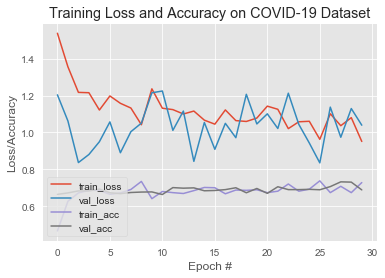

In [88]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


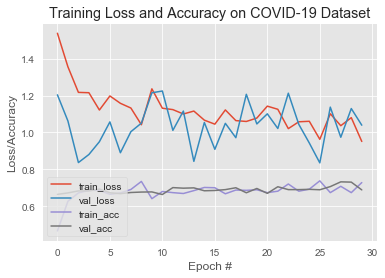

In [89]:
# plot the training loss and accuracy

N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('performance2.png', ppi=300)


In [90]:
print("[INFO] evaluating network...")
predval = model.predict(valid_X)


[INFO] evaluating network...


In [91]:
predval2 = np.argmax(predval, axis=1)


In [92]:
print(classification_report(valid_Y.argmax(axis=1), predval2))
print(train_generator.class_indices)
scores = model.evaluate(test_X, test_Y, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])


precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.00      0.00      0.00        73
           2       0.00      0.00      0.00       195
           3       0.69      1.00      0.82      1134
           4       0.00      0.00      0.00        58
           5       1.00      0.40      0.57       161

    accuracy                           0.70      1700
   macro avg       0.28      0.23      0.23      1700
weighted avg       0.56      0.70      0.60      1700

{'Atelectasis': 0, 'Effusion': 1, 'Infiltration': 2, 'No Finding': 3, 'Nodule': 4, 'Pneumonia': 5}
1700/1700 [==============================] - 9s 5ms/step
Validation loss: 0.9574907802132999
Validation accuracy: 0.7082353234291077


In [93]:
valid_Y

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [94]:
predval2

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [95]:
predval

array([[0.04991401, 0.04705981, 0.08342721, 0.7863538 , 0.0232604 ,
        0.00998475],
       [0.06644595, 0.0579118 , 0.12340952, 0.5346799 , 0.05845577,
        0.15909706],
       [0.04011751, 0.02726176, 0.07563353, 0.80428445, 0.02488647,
        0.02781637],
       ...,
       [0.02213104, 0.01230699, 0.05392302, 0.89435077, 0.01148872,
        0.00579945],
       [0.03722396, 0.02130741, 0.0825291 , 0.75336635, 0.03059035,
        0.07498273],
       [0.04047322, 0.03568757, 0.08662882, 0.63123155, 0.05136133,
        0.1546174 ]], dtype=float32)

In [96]:
valid_Y

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [97]:
valid_Y[:, 5]

array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

In [98]:
scores = model.evaluate(valid_X, valid_Y, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])


1700/1700 [==============================] - 9s 5ms/step
Validation loss: 0.9646380072481492
Validation accuracy: 0.7047058939933777


In [99]:
predval2

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [100]:
valid_Y[:, 10].astype(int)

IndexError: index 10 is out of bounds for axis 1 with size 6

In [101]:
valid_Y[:, 5].astype(int)

array([0, 0, 0, ..., 0, 0, 1])

In [102]:
valid_Y[:, 5].values()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [103]:
len(valid_Y[:, 5])

1700

In [104]:
predval2[:]

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [105]:
len(predval2)

1700

In [106]:
train_generator.class_indices

{'Atelectasis': 0,
 'Effusion': 1,
 'Infiltration': 2,
 'No Finding': 3,
 'Nodule': 4,
 'Pneumonia': 5}

In [107]:
enumerate(train_generator.class_indices)

In [108]:
for (i, label) in enumerate(train_generator.class_indices):
	print(i, " ", label)


0   Atelectasis
1   Effusion
2   Infiltration
3   No Finding
4   Nodule
5   Pneumonia


In [109]:
fig, c_ax = plt.subplots(1, 1)

for (i, label) in enumerate(train_generator.class_indices):
	fpr, tpr, thresholds = roc_curve(valid_Y[:, i].astype(int), predval[:, i])
	c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))


NameError: name 'roc_curve' is not defined

In [110]:
from sklearn.metrics import roc_curve, auc


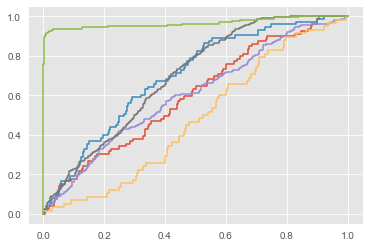

In [111]:
fig, c_ax = plt.subplots(1, 1)

for (i, label) in enumerate(train_generator.class_indices):
	fpr, tpr, thresholds = roc_curve(valid_Y[:, i].astype(int), predval[:, i])
	c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))


In [112]:
c_ax.legend()


Text(0, 0.5, 'True Positive Rate')

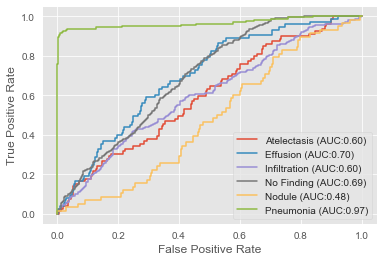

In [113]:
fig, c_ax = plt.subplots(1, 1)

for (i, label) in enumerate(train_generator.class_indices):
	fpr, tpr, thresholds = roc_curve(valid_Y[:, i].astype(int), predval[:, i])
	c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))
# Set labels for plot

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')


In [114]:
valid_Y

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [115]:
predval

array([[0.04991401, 0.04705981, 0.08342721, 0.7863538 , 0.0232604 ,
        0.00998475],
       [0.06644595, 0.0579118 , 0.12340952, 0.5346799 , 0.05845577,
        0.15909706],
       [0.04011751, 0.02726176, 0.07563353, 0.80428445, 0.02488647,
        0.02781637],
       ...,
       [0.02213104, 0.01230699, 0.05392302, 0.89435077, 0.01148872,
        0.00579945],
       [0.03722396, 0.02130741, 0.0825291 , 0.75336635, 0.03059035,
        0.07498273],
       [0.04047322, 0.03568757, 0.08662882, 0.63123155, 0.05136133,
        0.1546174 ]], dtype=float32)

In [116]:
valid_Y.argmax(axis=1)

array([1, 3, 3, ..., 3, 3, 5], dtype=int64)

In [117]:
predval2

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [118]:
train_generator.class_indices

{'Atelectasis': 0,
 'Effusion': 1,
 'Infiltration': 2,
 'No Finding': 3,
 'Nodule': 4,
 'Pneumonia': 5}

In [119]:
name = train_generator.class_indices

In [120]:
name

{'Atelectasis': 0,
 'Effusion': 1,
 'Infiltration': 2,
 'No Finding': 3,
 'Nodule': 4,
 'Pneumonia': 5}

In [121]:
name[0]

KeyError: 0

In [122]:
name.items

<function dict.items>

In [123]:
dict(list(name.items()))

{'Atelectasis': 0,
 'Effusion': 1,
 'Infiltration': 2,
 'No Finding': 3,
 'Nodule': 4,
 'Pneumonia': 5}

In [124]:
name = []

for i in train_generator.class_indices.keys():
	name.append(i)


In [125]:
name

['Atelectasis',
 'Effusion',
 'Infiltration',
 'No Finding',
 'Nodule',
 'Pneumonia']

In [126]:
name = []

for i in train_generator.class_indices.keys():
	name.append(i)
# print(train_generator.class_indices) # name in dict

print(classification_report(valid_Y.argmax(axis=1), predval2, target_names=name))



precision    recall  f1-score   support

 Atelectasis       0.00      0.00      0.00        79
    Effusion       0.00      0.00      0.00        73
Infiltration       0.00      0.00      0.00       195
  No Finding       0.69      1.00      0.82      1134
      Nodule       0.00      0.00      0.00        58
   Pneumonia       1.00      0.40      0.57       161

    accuracy                           0.70      1700
   macro avg       0.28      0.23      0.23      1700
weighted avg       0.56      0.70      0.60      1700



In [127]:
scores = model.evaluate(valid_X, valid_Y, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])


1700/1700 [==============================] - 9s 5ms/step
Validation loss: 0.9646380072481492
Validation accuracy: 0.7047058939933777


In [128]:
# draw the data distribution

df_draw = pd.DataFrame(data={'labels':labels, 'num':num})
df_draw = df_draw.sort_values(by='num', ascending=False)
sns_plot = sns.barplot(x='num', y='labels', data=df_draw, color="green")
sns_plot.save("./fig/data_distribution.png")


AttributeError: 'AxesSubplot' object has no attribute 'save'

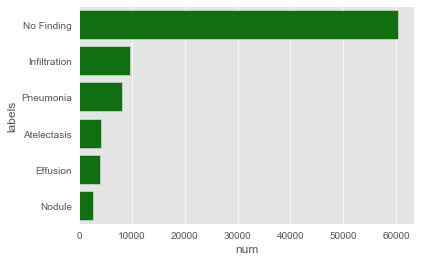

In [129]:
sns_plot = sns.barplot(x='num', y='labels', data=df_draw, color="green")


In [130]:
sns_plot.savefig("./fig/data_distribution.png")


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [131]:
sns_plot.savefig("./fig/data_distribution.png")


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [132]:
sns_plot.savefig("data_distribution.png")


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [133]:
sns_plot.figure.savefig("./fig/data_distribution.png")


In [134]:
df_draw = pd.DataFrame(data={'labels':labels, 'num':num})
df_draw = df_draw.sort_values(by='num', ascending=False)
sns_plot = sns.barplot(x='num', y='labels', data=df_draw, color="green",height=8.27, aspect=11.7/8.27)
sns_plot.figure.savefig("./fig/data_distribution.png")


TypeError: barh() got multiple values for argument 'height'

In [135]:
sns_plot

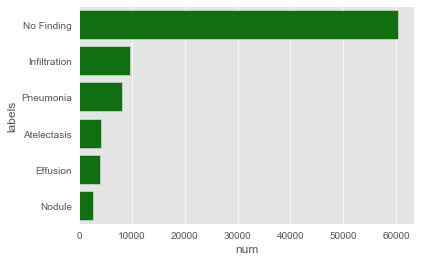

In [136]:
sns_plot.figure

In [137]:
sns_plot.figure.savefig("./fig/data_distribution.png")


In [138]:
plt.figure(figsize=(15,8), ppi=300)
ax = sns.barplot(x='num', y='labels', data=df_draw, color="green")


TypeError: __init__() got an unexpected keyword argument 'ppi'

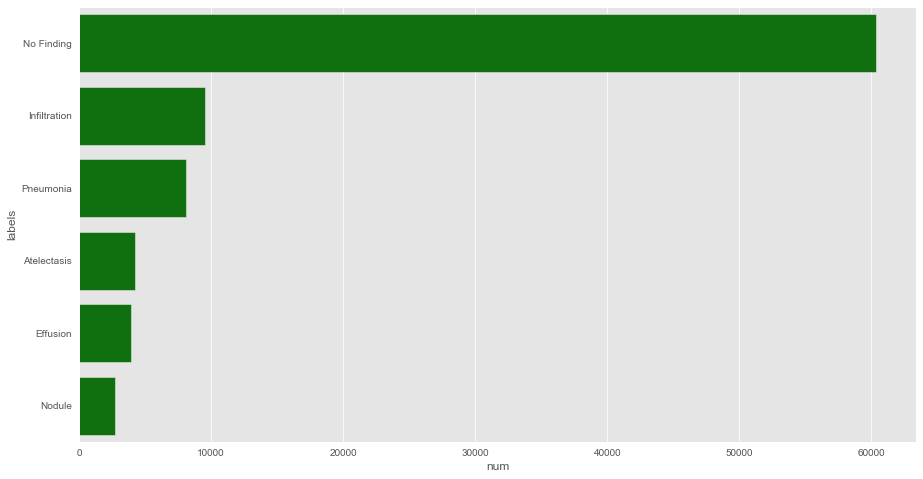

In [139]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='num', y='labels', data=df_draw, color="green")


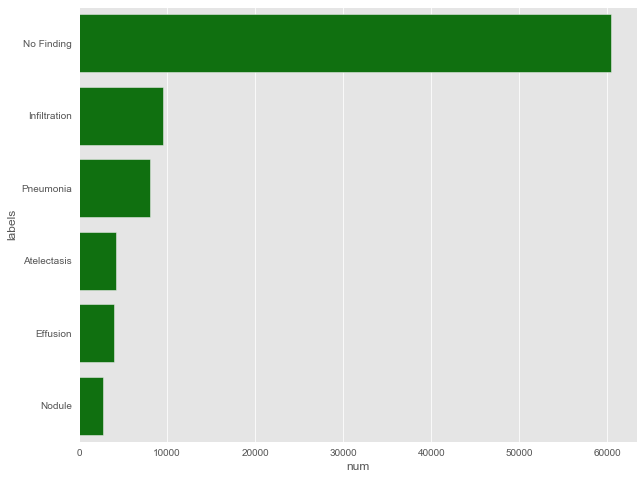

In [140]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='num', y='labels', data=df_draw, color="green")


In [141]:
ax

In [142]:
ax.savefig("./fig/data_distribution.png")


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [143]:
ax.figure.savefig("./fig/data_distribution.png")


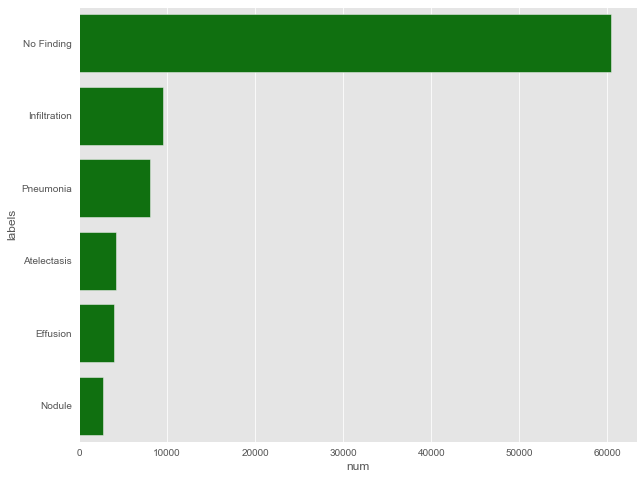

In [144]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='num', y='labels', data=df_draw, color="green")


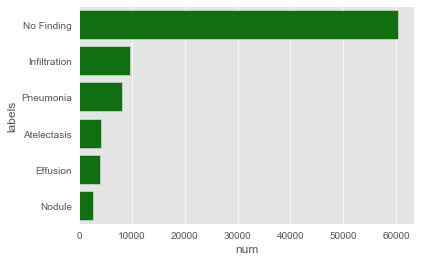

In [145]:
ax = sns.barplot(x='num', y='labels', data=df_draw, color="green")


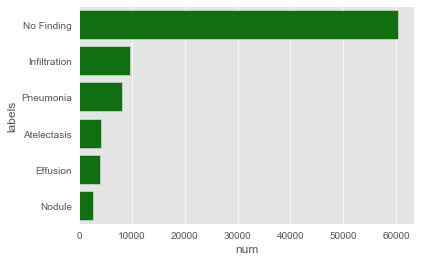

In [146]:
ax = sns.barplot(x='num', y='labels', data=df_draw, color="green")
fig = ax.get_figure()
fig.savefig('./fig/a.png')


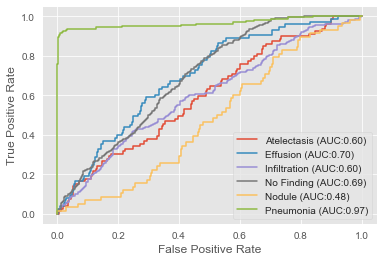

In [147]:
fig, c_ax = plt.subplots(1, 1)

for (i, label) in enumerate(train_generator.class_indices):
	fpr, tpr, thresholds = roc_curve(valid_Y[:, i].astype(int), predval[:, i])
	c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))
# Set labels for plot

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('./fig/auc_vgg16.png')


In [148]:
fig, c_ax = plt.subplots((1, 1),figsize=(10,8))


TypeError: 'tuple' object cannot be interpreted as an integer

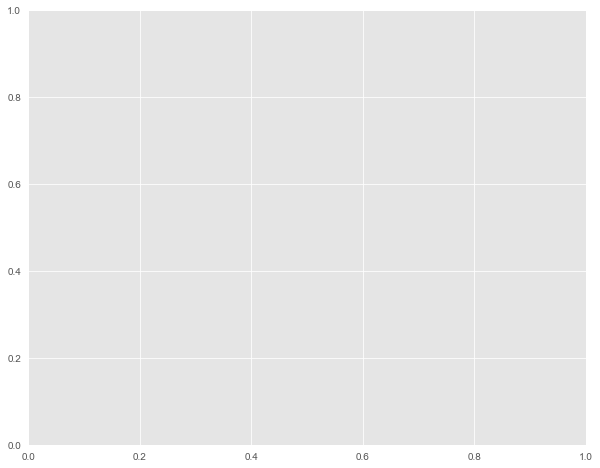

In [149]:
fig, c_ax = plt.subplots(1, 1,figsize=(10,8))


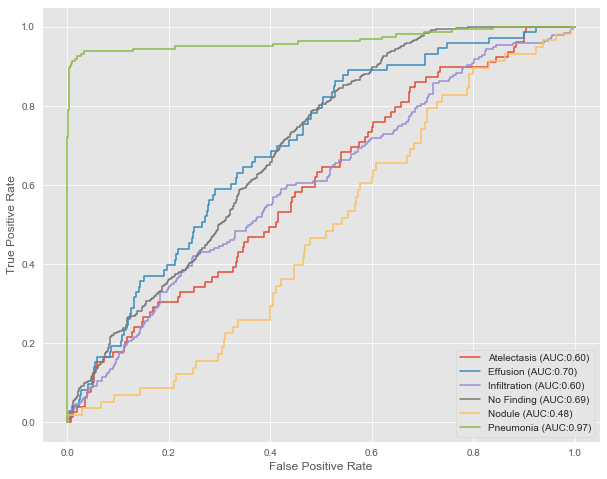

In [150]:
fig, c_ax = plt.subplots(1, 1,figsize=(10,8))

for (i, label) in enumerate(train_generator.class_indices):
	fpr, tpr, thresholds = roc_curve(valid_Y[:, i].astype(int), predval[:, i])
	c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))
# Set labels for plot

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('./fig/auc_vgg16.png')


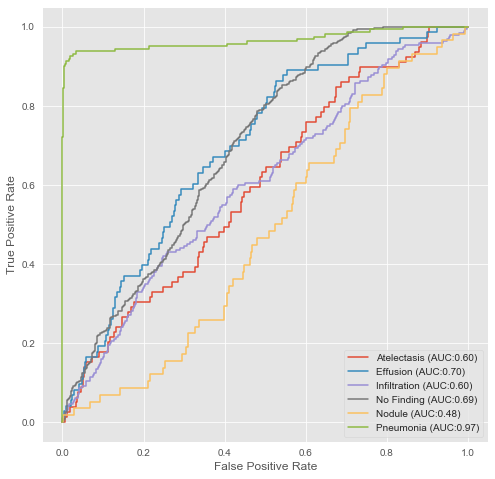

In [151]:
fig, c_ax = plt.subplots(1, 1,figsize=(8,8))

for (i, label) in enumerate(train_generator.class_indices):
	fpr, tpr, thresholds = roc_curve(valid_Y[:, i].astype(int), predval[:, i])
	c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))
# Set labels for plot

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('./fig/auc_vgg16.png')
